In [6]:
from collections import defaultdict
import vmapper
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.ops import transform, split

import matplotlib.pyplot as plt
import seaborn as sns

from catppuccin_palette import catppuccin as cpc
import mplcatppuccin
from mplcatppuccin.palette import load_color
from mplcatppuccin.colormaps import get_colormap_from_list
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
#from jinja2 import Environment, PackageLoader, select_autoescape
import jinja2

<Axes: >

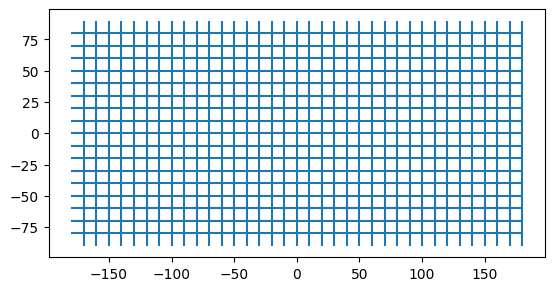

In [2]:
fp = '../data/natural_earth/ne_110m_graticules_10.shp'
grid = gpd.read_file(fp)
grid['display0'] = [d.replace(' ', '') for d in grid['display']]

grid.plot()

In [3]:
grid.head()

,degrees,direction,display,scalerank,dd,geometry,display0
0,80,N,80 N,4,80,"LINESTRING (180.00000 79.99848, 179.99664 79.9...",80N
1,70,N,70 N,4,70,"LINESTRING (180.00000 69.99847, 179.99664 69.9...",70N
2,60,N,60 N,4,60,"LINESTRING (180.00000 59.99866, 179.99664 59.9...",60N
3,50,N,50 N,4,50,"LINESTRING (179.99990 49.99876, 179.99664 49.9...",50N
4,40,N,40 N,4,40,"LINESTRING (179.99990 39.99875, 179.99664 39.9...",40N


In [4]:
grid['direction'].unique()

array(['N', 'S', 'E', 'W'], dtype=object)

In [21]:
grid2 = []
for direction in ['N', 'S']:
    split_line1 = LineString([(179.99999999999, 95), (179.99999999999, -95)])  #179.99999999999
    split_line2 = LineString([(-179.99999999999, 95), (-179.99999999999, -95)])
    tmp = grid[grid['direction']==direction].copy()
    geoms = []
    for g in tmp.geometry:
        splited = split(g, split_line1)
        splited = [p for p in splited.geoms]
        if len(splited)>1:
            splited = [(l.length, l) for l in splited]
            splited = sorted(splited)
            g = splited[-1][1]
        splited = split(g, split_line2)
        splited = [p for p in splited.geoms]
        if len(splited)>1:
            splited = [(l.length, l) for l in splited]
            splited = sorted(splited)
            g = splited[-1][1]
        #print(g.xy[0])
        geoms.append(g)
    tmp['geometry'] = geoms
    grid2.append(tmp)

for direction in ['E', 'W']:
    split_line1 = LineString([(185, 90), (-185, 90)]) 
    split_line2 = LineString([(185, -90), (-185, -90)])
    tmp = grid[grid['direction']==direction].copy()
    geoms = []
    for g in tmp.geometry:
        splited = split(g, split_line1)
        splited = [p for p in splited.geoms]
        if len(splited)>1:
            splited = [(l.length, l) for l in splited]
            splited = sorted(splited)
            g = splited[-1][1]
        splited = split(g, split_line2)
        splited = [p for p in splited.geoms]
        if len(splited)>1:
            splited = [(l.length, l) for l in splited]
            splited = sorted(splited)
            g = splited[-1][1]
        #print(g.xy[0])
        geoms.append(g)
    tmp['geometry'] = geoms
    grid2.append(tmp)
grid2 = pd.concat(grid2)
grid2

,degrees,direction,display,scalerank,dd,geometry,display0
0,80,N,80 N,4,80,"LINESTRING (180.00000 79.99848, 179.99664 79.9...",80N
1,70,N,70 N,4,70,"LINESTRING (180.00000 69.99847, 179.99664 69.9...",70N
2,60,N,60 N,4,60,"LINESTRING (180.00000 59.99866, 179.99664 59.9...",60N
3,50,N,50 N,4,50,"LINESTRING (179.99990 49.99876, 179.99664 49.9...",50N
4,40,N,40 N,4,40,"LINESTRING (179.99990 39.99875, 179.99664 39.9...",40N
5,30,N,30 N,4,30,"LINESTRING (179.99990 29.99889, 179.99664 29.9...",30N
6,20,N,20 N,4,20,"LINESTRING (180.00000 19.99909, 179.99664 19.9...",20N
7,10,N,10 N,4,10,"LINESTRING (179.99990 9.99918, 179.99664 9.999...",10N
8,0,N,0 NS,4,0,"LINESTRING (179.99990 -0.00083, 179.99664 -0.0...",0NS
9,10,S,10 S,4,-10,"LINESTRING (179.99990 -10.00068, 179.99664 -10...",10S


<Axes: >

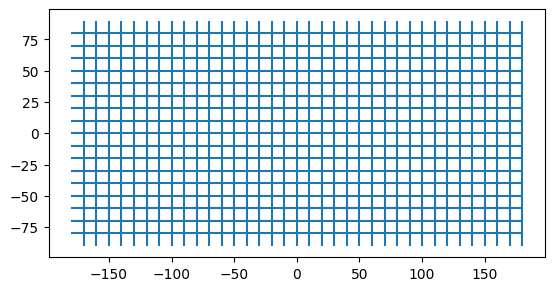

In [22]:
grid2.plot()

In [23]:
fp2 = '../data/natural_earth/ne_110m_graticules_10_b.shp'
grid2.to_file(fp2)